# Mahadharsan Ravichandran 

#  Section 1 - Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Section 2 - Importing data

In [2]:
df1 = pd.read_excel("countrybranding.xlsx",sheet_name='DV GDP_PPP')

In [3]:
df1.head()

,country,2016,2017,2018,2019,2020,2021,2022
0,Algeria,11685.451418,11809.483033,12007.774713,12120.406374,11452.226624,12170.193777,13209.596769
1,Argentina,20307.870052,23597.117753,23294.098675,23007.836592,20787.857871,23754.361390,26504.590562
2,Australia,47249.434815,48400.245788,50192.957328,51909.015102,53066.490989,55947.052228,62625.357642
3,Austria,52684.017113,54172.986789,56937.944283,59704.223378,57258.690227,59962.827052,67935.847974
4,Azerbaijan,14371.022741,14121.406936,14551.200114,15054.544607,14495.656972,15927.210148,17764.445589


In [4]:
df2 = pd.read_excel("countrybranding.xlsx",sheet_name='IVs factors')

In [5]:
df2.head()

,Year,Brand,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,2016,Algeria,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,2016,Argentina,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393
2,2016,Australia,70.436610,90.764070,90.823771,53.479153,68.656392,70.613007,24.834436,32.117963,51.123450,94.910648
3,2016,Austria,59.247783,73.448695,77.106312,37.663487,66.337010,35.716511,8.974374,49.510705,11.188092,71.207580
4,2016,Azerbaijan,1.671710,3.159704,1.539496,1.715254,37.746434,4.412014,4.836940,3.070438,35.930836,5.499866


In [6]:
df1.shape

(87, 8)

In [7]:
df2.shape

(536, 12)

In [8]:
df1.isnull().sum()

country    0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       1
dtype: int64

In [9]:
df2.isnull().sum()

Year                  0
Brand                 0
ENTREPRENEURSHIP      0
QUALITY OF LIFE       0
SOCIAL PURPOSE        0
CULTURAL INFLUENCE    0
OPEN FOR BUSINESS     0
ADVENTURE             0
POWER                 0
HERITAGE              0
MOVERS                0
OVERALL               0
dtype: int64

# Section 3 - Data Preprocessing

In [10]:
df1.fillna(df1.mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6976\3865222721.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.fillna(df1.mean(), inplace=True)


In [11]:
df1.isnull().sum()

country    0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
dtype: int64

In [12]:
# Reshape df1 to have 'country' and 'year' as columns
df1_melted = df1.melt(id_vars='country', var_name='Year', value_name='gdp_ppp')

# Sort the DataFrame by 'country' and 'year'
df1_melted.sort_values(by=['country', 'Year'], inplace=True)

# Reset index
df1_melted.reset_index(drop=True, inplace=True)
print(df1_melted)

      country  Year       gdp_ppp
0     Algeria  2016  11685.451418
1     Algeria  2017  11809.483033
2     Algeria  2018  12007.774713
3     Algeria  2019  12120.406374
4     Algeria  2020  11452.226624
..        ...   ...           ...
604  Zimbabwe  2018   2457.309859
605  Zimbabwe  2019   2296.845429
606  Zimbabwe  2020   2101.804597
607  Zimbabwe  2021   2333.973632
608  Zimbabwe  2022   2530.645987

[609 rows x 3 columns]


In [13]:
# Merge the GDP dataframe with the melted attributes dataframe on 'country'
df_merged = pd.merge(df1_melted, df2, how='inner', left_on=['country','Year'], right_on=['Brand','Year'])

In [14]:
df_merged.head()

,country,Year,gdp_ppp,Brand,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,2016,11685.451418,Algeria,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,Algeria,2017,11809.483033,Algeria,1.685184,1.725721,1.660032,0.000000,44.292922,4.013858,6.055662,5.988512,12.171768,1.361959
2,Algeria,2018,12007.774713,Algeria,0.263182,3.517729,1.696277,0.000000,34.983708,4.644542,4.627170,6.010481,8.016025,0.000000
3,Algeria,2022,13209.596769,Algeria,2.743563,1.922201,4.487852,2.004167,41.428250,5.672375,4.835233,6.026901,10.543583,2.595100
4,Argentina,2016,20307.870052,Argentina,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393


In [15]:
dff = df_merged.drop('Brand',axis='columns')
dff.head()

,country,Year,gdp_ppp,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,2016,11685.451418,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,Algeria,2017,11809.483033,1.685184,1.725721,1.660032,0.000000,44.292922,4.013858,6.055662,5.988512,12.171768,1.361959
2,Algeria,2018,12007.774713,0.263182,3.517729,1.696277,0.000000,34.983708,4.644542,4.627170,6.010481,8.016025,0.000000
3,Algeria,2022,13209.596769,2.743563,1.922201,4.487852,2.004167,41.428250,5.672375,4.835233,6.026901,10.543583,2.595100
4,Argentina,2016,20307.870052,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393


# Section 4 - EDA and Overall Multiple Linear Regression

In [16]:
df_merged.corr()['gdp_ppp']

gdp_ppp               1.000000
ENTREPRENEURSHIP      0.667611
QUALITY OF LIFE       0.659648
SOCIAL PURPOSE        0.625079
CULTURAL INFLUENCE    0.473734
OPEN FOR BUSINESS     0.466106
ADVENTURE             0.098515
POWER                 0.268593
HERITAGE              0.029719
MOVERS                0.044954
OVERALL               0.635785
Name: gdp_ppp, dtype: float64

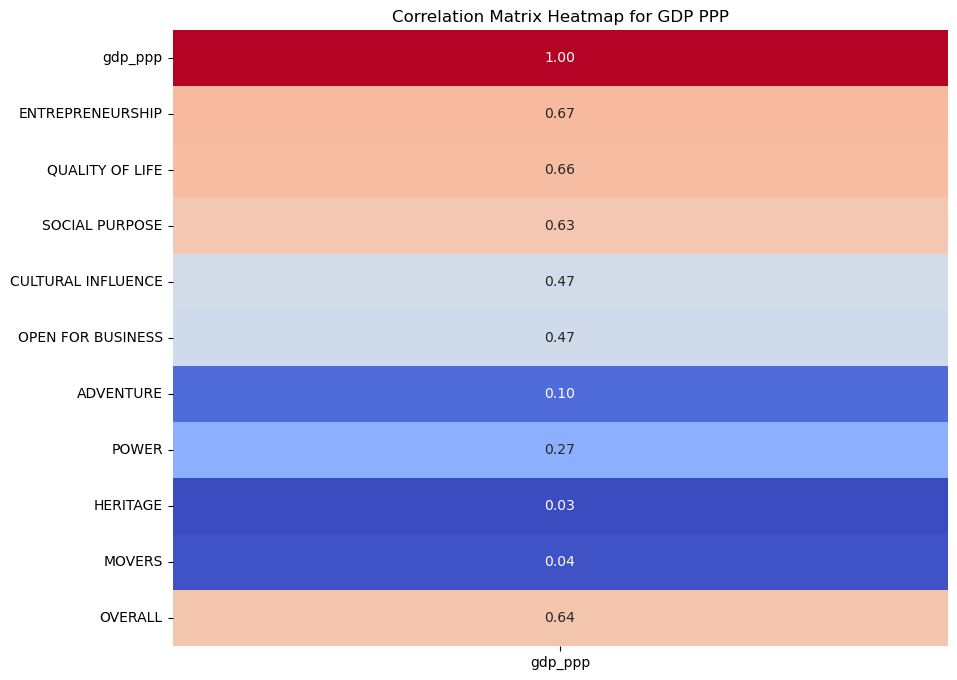

In [102]:
corr_matrix = pd.DataFrame(df_merged.corr()['gdp_ppp'])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation Matrix Heatmap for GDP PPP')
plt.show()

In [17]:
df_merged.head()

,country,Year,gdp_ppp,Brand,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,2016,11685.451418,Algeria,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,Algeria,2017,11809.483033,Algeria,1.685184,1.725721,1.660032,0.000000,44.292922,4.013858,6.055662,5.988512,12.171768,1.361959
2,Algeria,2018,12007.774713,Algeria,0.263182,3.517729,1.696277,0.000000,34.983708,4.644542,4.627170,6.010481,8.016025,0.000000
3,Algeria,2022,13209.596769,Algeria,2.743563,1.922201,4.487852,2.004167,41.428250,5.672375,4.835233,6.026901,10.543583,2.595100
4,Argentina,2016,20307.870052,Argentina,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393


In [18]:
corr_year = df_merged.groupby('Year').corr()['gdp_ppp']

In [19]:
print(corr_year)

Year                    
2016  gdp_ppp               1.000000
      ENTREPRENEURSHIP      0.704996
      QUALITY OF LIFE       0.698765
      SOCIAL PURPOSE        0.712548
      CULTURAL INFLUENCE    0.490789
                              ...   
2022  ADVENTURE             0.213271
      POWER                 0.226496
      HERITAGE              0.096022
      MOVERS                0.054026
      OVERALL               0.618408
Name: gdp_ppp, Length: 77, dtype: float64


**(a) Correlation of all factors with GDP_PPP**

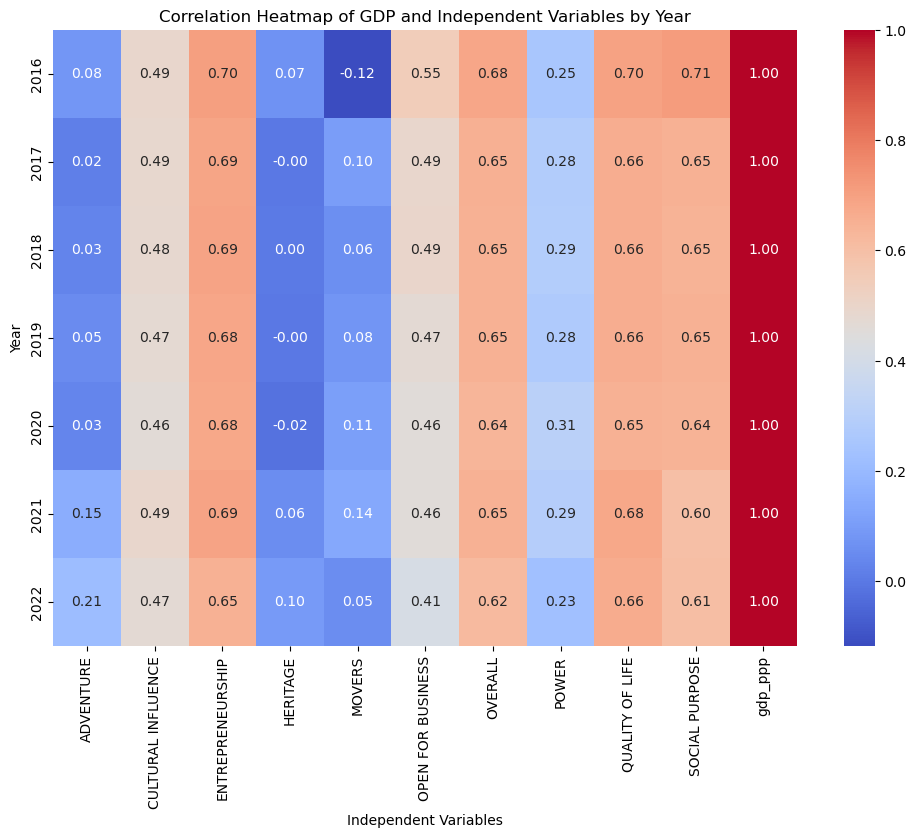

In [20]:
corr_year_reset = corr_year.reset_index()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_year_reset.pivot('Year', 'level_1', 'gdp_ppp'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of GDP and Independent Variables by Year')
plt.xlabel('Independent Variables')
plt.ylabel('Year')
plt.show()

In [21]:
Y = df_merged['gdp_ppp']
X= df_merged.drop('gdp_ppp',axis='columns')

In [22]:
X.head()

,country,Year,Brand,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,2016,Algeria,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,Algeria,2017,Algeria,1.685184,1.725721,1.660032,0.000000,44.292922,4.013858,6.055662,5.988512,12.171768,1.361959
2,Algeria,2018,Algeria,0.263182,3.517729,1.696277,0.000000,34.983708,4.644542,4.627170,6.010481,8.016025,0.000000
3,Algeria,2022,Algeria,2.743563,1.922201,4.487852,2.004167,41.428250,5.672375,4.835233,6.026901,10.543583,2.595100
4,Argentina,2016,Argentina,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393


In [23]:
same_values = (X['country'] == X['Brand']).all()

if same_values:
    print("The 'Country' and 'Brand' columns have the same values throughout the dataframe.")
else:
    print("The 'Country' and 'Brand' columns have different values in the dataframe.")

The 'Country' and 'Brand' columns have the same values throughout the dataframe.


In [24]:
X = X.drop('Brand',axis='columns')

In [25]:
X.head()

,country,Year,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,2016,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,Algeria,2017,1.685184,1.725721,1.660032,0.000000,44.292922,4.013858,6.055662,5.988512,12.171768,1.361959
2,Algeria,2018,0.263182,3.517729,1.696277,0.000000,34.983708,4.644542,4.627170,6.010481,8.016025,0.000000
3,Algeria,2022,2.743563,1.922201,4.487852,2.004167,41.428250,5.672375,4.835233,6.026901,10.543583,2.595100
4,Argentina,2016,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393


In [26]:
X.iloc[:,2:-1].values

array([[ 0.88676757,  1.26177185,  0.2037079 , ...,  6.47664041,
         2.26471715, 11.99000923],
       [ 1.68518447,  1.72572078,  1.66003221, ...,  6.05566198,
         5.9885125 , 12.17176812],
       [ 0.26318226,  3.51772947,  1.69627731, ...,  4.62717022,
         6.01048104,  8.01602497],
       ...,
       [ 9.52986098, 18.24027687,  2.38769053, ...,  9.45537869,
        40.3926899 , 38.12881911],
       [ 9.05094884, 20.71152444,  1.79068779, ..., 15.05916504,
        42.35532807, 42.56904903],
       [14.02247874, 17.52238581,  1.86664633, ..., 14.98222118,
        37.05020719, 35.36340381]])

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X.iloc[:,2:-1])

In [28]:
print(X_scaled)

[[-0.92587878 -1.02210306 -0.83808087 ... -0.48528924 -1.1976229
  -0.89457458]
 [-0.90007003 -1.00639771 -0.79264158 ... -0.50192518 -1.05419637
  -0.88698369]
 [-0.94603612 -0.94573559 -0.79151068 ... -0.55837536 -1.05335022
  -1.06054195]
 ...
 [-0.64649155 -0.44735576 -0.76993765 ... -0.36757744  0.27092259
   0.19707283]
 [-0.66197234 -0.3637004  -0.78856495 ... -0.14613075  0.346516
   0.38251225]
 [-0.50126808 -0.47165742 -0.78619494 ... -0.14917137  0.14218278
   0.0815795 ]]


In [29]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_scaled, Y)

LinearRegression()

**(b) Coefficients of all factors for all countries**

In [30]:
lr_model.coef_

array([ 20782.00368947,    710.42696728,  -3161.19298587,  10529.89000035,
           50.30056936,  -3519.41021122, -10946.6805446 ,  -7045.91247943,
         -337.2801362 ])

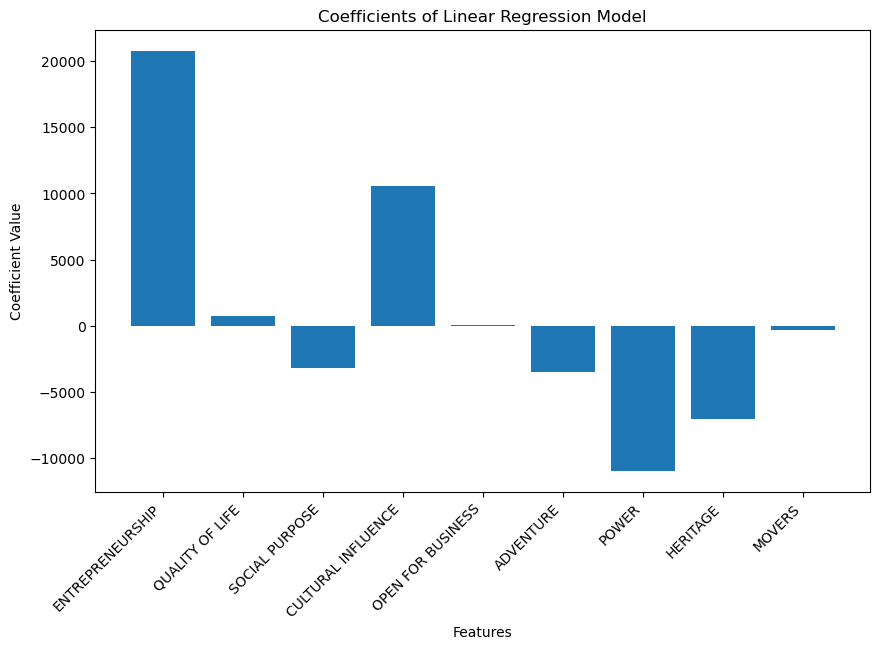

In [108]:
coefficients = lr_model.coef_
feature_names = X.columns  

plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right') 
plt.show()


Text(0.5, 1.0, 'Correlation between Entrepreneurship score and GDP_PPP')

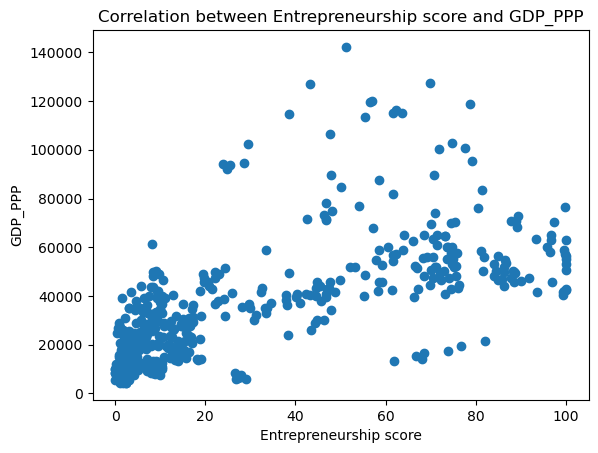

In [31]:
plt.scatter(X['ENTREPRENEURSHIP'],Y)
plt.xlabel('Entrepreneurship score')
plt.ylabel('GDP_PPP')
plt.title('Correlation between Entrepreneurship score and GDP_PPP')

Text(0.5, 1.0, 'Correlation between Quality of life score and GDP_PPP')

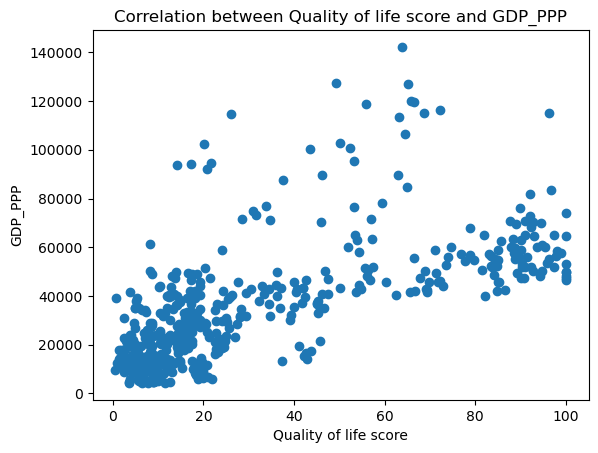

In [32]:
plt.scatter(X['QUALITY OF LIFE'],Y)
plt.xlabel('Quality of life score')
plt.ylabel('GDP_PPP')
plt.title('Correlation between Quality of life score and GDP_PPP')

Text(0.5, 1.0, 'Correlation between Cultural score and GDP_PPP')

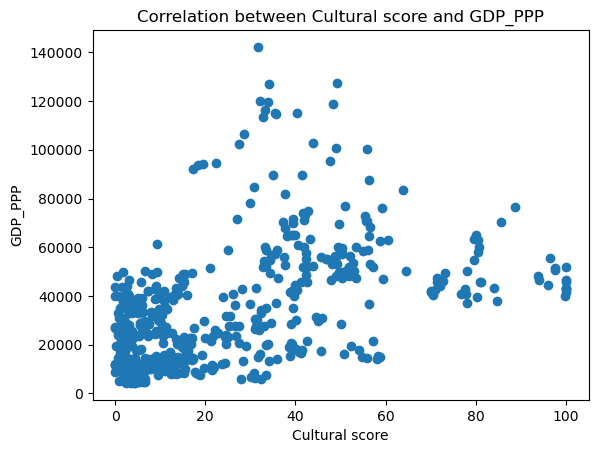

In [33]:
plt.scatter(X['CULTURAL INFLUENCE'],Y)
plt.xlabel('Cultural score')
plt.ylabel('GDP_PPP')
plt.title('Correlation between Cultural score and GDP_PPP')

# Section 5 - Multiple Linear Regression for each year

In [34]:
dff.head()

,country,Year,gdp_ppp,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,2016,11685.451418,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,Algeria,2017,11809.483033,1.685184,1.725721,1.660032,0.000000,44.292922,4.013858,6.055662,5.988512,12.171768,1.361959
2,Algeria,2018,12007.774713,0.263182,3.517729,1.696277,0.000000,34.983708,4.644542,4.627170,6.010481,8.016025,0.000000
3,Algeria,2022,13209.596769,2.743563,1.922201,4.487852,2.004167,41.428250,5.672375,4.835233,6.026901,10.543583,2.595100
4,Argentina,2016,20307.870052,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393


In [35]:
regression_results = []

for year in dff['Year'].unique():
    # Filter the dataframe for the current year
    df_year = dff[dff['Year'] == year]
    
    X = df_year.drop(['country', 'Year', 'gdp_ppp','OVERALL'], axis=1)
    y = df_year['gdp_ppp']
    
    sc = StandardScaler()
    X_scale = sc.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_scale, y)
    
    coefficients = model.coef_
    intercept = model.intercept_
    
    results_dict = {'Year': year, 'Coefficients': coefficients, 'Intercept': intercept}
    regression_results.append(results_dict)

regression_results_df = pd.DataFrame(regression_results)
print(regression_results_df)


   Year                                       Coefficients     Intercept
0  2016  [23512.992670678897, -21737.58664371249, 15918...  29938.429054
1  2017  [19661.56941996578, -16297.82637077329, 12847....  32211.114446
2  2018  [19597.932928490663, -5165.581650943947, 520.1...  33621.467877
3  2022  [45789.208885680564, -16074.92348791445, 9343....  40523.730338
4  2019  [23674.36156234281, -10602.802009925685, 4327....  35455.570937
5  2020  [19225.913518092846, -13171.27508646343, 8794....  33499.581736
6  2021  [33744.85993550282, -7246.355961149031, 1078.1...  35644.258724


In [117]:
regression_results_df[['Year','Coefficients']]

,Year,Coefficients
0,2016,"[23512.992670678897, -21737.58664371249, 15918..."
1,2017,"[19661.56941996578, -16297.82637077329, 12847...."
2,2018,"[19597.932928490663, -5165.581650943947, 520.1..."
3,2022,"[45789.208885680564, -16074.92348791445, 9343...."
4,2019,"[23674.36156234281, -10602.802009925685, 4327...."
5,2020,"[19225.913518092846, -13171.27508646343, 8794...."
6,2021,"[33744.85993550282, -7246.355961149031, 1078.1..."


# Section 6 - Multi Variate Regression for each country

In [37]:
grouped = dff.groupby('country')

results = {}

# Perform multivariate multiple regression for each country
for country, data in grouped:
    X = data[['ENTREPRENEURSHIP', 'QUALITY OF LIFE', 'SOCIAL PURPOSE', 'CULTURAL INFLUENCE', 
              'OPEN FOR BUSINESS', 'ADVENTURE', 'POWER', 'HERITAGE', 'MOVERS']]
    X = sm.add_constant(X)
    y = data['gdp_ppp']
    
    model = sm.OLS(y, X).fit()
    results[country] = model.params[1:]  # Store coefficients

In [38]:
results_df = pd.DataFrame(results).T

In [39]:
results_df.isnull().sum()

ADVENTURE             0
CULTURAL INFLUENCE    0
ENTREPRENEURSHIP      5
HERITAGE              0
MOVERS                0
OPEN FOR BUSINESS     0
POWER                 0
QUALITY OF LIFE       0
SOCIAL PURPOSE        0
dtype: int64

In [40]:
med = results_df['ENTREPRENEURSHIP'].median()
results_df['ENTREPRENEURSHIP'] = results_df['ENTREPRENEURSHIP'].fillna(med)

In [41]:
results_df.isnull().sum()

ADVENTURE             0
CULTURAL INFLUENCE    0
ENTREPRENEURSHIP      0
HERITAGE              0
MOVERS                0
OPEN FOR BUSINESS     0
POWER                 0
QUALITY OF LIFE       0
SOCIAL PURPOSE        0
dtype: int64

In [42]:
results_df

,ADVENTURE,CULTURAL INFLUENCE,ENTREPRENEURSHIP,HERITAGE,MOVERS,OPEN FOR BUSINESS,POWER,QUALITY OF LIFE,SOCIAL PURPOSE
Algeria,908.759183,376.382204,-381.309592,-406.210940,321.026101,41.231562,555.255074,889.490544,248.049478
Argentina,232.211065,-281.440699,95.931236,176.426372,-141.616785,33.620972,699.184827,69.227089,186.158661
Australia,319.663125,68.780202,841.809316,374.974993,104.885925,306.879257,527.416876,-539.709519,-450.128803
Austria,564.624117,90.284723,47.538636,24.178675,-291.516271,116.644301,161.855853,300.018864,-37.130420
Azerbaijan,-883.464414,-843.256928,1050.426296,-209.603382,299.651337,241.103379,-1096.905851,-785.800227,4126.967371
...,...,...,...,...,...,...,...,...,...
United Kingdom,-263.858882,964.639683,446.848988,-198.798678,-1270.435429,-129.998990,829.612257,-647.361414,-414.381364
United States,245.266222,670.937177,23.841099,476.013908,-320.746933,-454.216642,-162.623958,24.547368,-16.209006
Uruguay,-2143.181462,999.283707,401.041143,961.491081,-16.418797,782.167794,-317.834215,1089.141151,461.468730
Uzbekistan,20.263614,0.515927,9.253412,5.466502,46.760110,208.662477,22.376208,-2.701592,7.777866


In [43]:
dff.head()

,country,Year,gdp_ppp,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,OVERALL
0,Algeria,2016,11685.451418,0.886768,1.261772,0.203708,0.000000,34.180470,2.995269,6.476640,2.264717,11.990009,0.000000
1,Algeria,2017,11809.483033,1.685184,1.725721,1.660032,0.000000,44.292922,4.013858,6.055662,5.988512,12.171768,1.361959
2,Algeria,2018,12007.774713,0.263182,3.517729,1.696277,0.000000,34.983708,4.644542,4.627170,6.010481,8.016025,0.000000
3,Algeria,2022,13209.596769,2.743563,1.922201,4.487852,2.004167,41.428250,5.672375,4.835233,6.026901,10.543583,2.595100
4,Argentina,2016,20307.870052,8.079598,12.026906,14.489881,24.504258,30.600420,60.182326,3.458293,42.130897,13.720344,18.376393


# Section 6 - Multi variate Regression for each country and year

In [44]:
grouped = dff.groupby(['country', 'Year'])

results_withy = {}

for country, data in grouped:
    X = data[['ENTREPRENEURSHIP', 'QUALITY OF LIFE', 'SOCIAL PURPOSE', 'CULTURAL INFLUENCE', 
              'OPEN FOR BUSINESS', 'ADVENTURE', 'POWER', 'HERITAGE', 'MOVERS']]
    X = sm.add_constant(X)
    y = data['gdp_ppp']
    
    model = sm.OLS(y, X).fit()
    results_withy[country] = model.params  # Store coefficients

results_df_withy = pd.DataFrame(results_withy).T.reset_index()
results_df_withy.rename(columns={'index': 'country'}, inplace=True)

In [45]:
results_df_withy.rename(columns={'level_0': 'country', 'level_1': 'year'}, inplace=True)

In [46]:
results_df_withy.isnull().sum()

country               0
year                  0
ENTREPRENEURSHIP      0
QUALITY OF LIFE       0
SOCIAL PURPOSE        0
CULTURAL INFLUENCE    0
OPEN FOR BUSINESS     0
ADVENTURE             0
POWER                 0
HERITAGE              0
MOVERS                0
dtype: int64

In [47]:
results_df_withy.head()

,country,year,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS
0,Algeria,2016,7.560770,10.758137,1.736857,0.000000,291.430014,25.538303,55.221225,19.309464,102.229390
1,Algeria,2017,9.016338,9.233222,8.881764,0.000000,236.982925,21.475571,32.399951,32.040677,65.123300
2,Algeria,2018,2.285807,30.552406,14.732615,0.000000,303.842710,40.339068,40.188191,52.202610,69.621287
3,Algeria,2022,18.540383,12.989801,30.327903,13.543709,279.962842,38.332639,32.675425,40.728448,71.251173
4,Argentina,2016,21.721270,32.333250,38.954735,65.877483,82.266465,161.794749,9.297309,113.265112,36.885907


In [49]:
df_merged.head()[['country','Year','gdp_ppp']]

,country,Year,gdp_ppp
0,Algeria,2016,11685.451418
1,Algeria,2017,11809.483033
2,Algeria,2018,12007.774713
3,Algeria,2022,13209.596769
4,Argentina,2016,20307.870052


In [50]:
df_merged.rename(columns={'Year': 'year'}, inplace=True)

merge_df = pd.merge(results_df_withy, df_merged[['country', 'year', 'gdp_ppp']], on=['country', 'year'], how='left')

merge_df.head()

,country,year,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,gdp_ppp
0,Algeria,2016,7.560770,10.758137,1.736857,0.000000,291.430014,25.538303,55.221225,19.309464,102.229390,11685.451418
1,Algeria,2017,9.016338,9.233222,8.881764,0.000000,236.982925,21.475571,32.399951,32.040677,65.123300,11809.483033
2,Algeria,2018,2.285807,30.552406,14.732615,0.000000,303.842710,40.339068,40.188191,52.202610,69.621287,12007.774713
3,Algeria,2022,18.540383,12.989801,30.327903,13.543709,279.962842,38.332639,32.675425,40.728448,71.251173,13209.596769
4,Argentina,2016,21.721270,32.333250,38.954735,65.877483,82.266465,161.794749,9.297309,113.265112,36.885907,20307.870052


**(c) Country segmentation by brute force method**

In [51]:
# Calculate the year-to-year change in GDP PPP for each country
merge_df['gdp_ppp_change'] = merge_df.groupby('country')['gdp_ppp'].diff()

# Identify years with significant GDP PPP increase for each country
significant_increase = merge_df[merge_df['gdp_ppp_change'] > 0]

# Identify the coefficient factor(s) that changed the most during those years
significant_increase_factors = significant_increase[['country', 'year', 'gdp_ppp_change', 'ENTREPRENEURSHIP','QUALITY OF LIFE', 'SOCIAL PURPOSE', 'CULTURAL INFLUENCE', 'OPEN FOR BUSINESS', 'ADVENTURE', 'POWER', 'HERITAGE', 'MOVERS']]

# Calculate the factor with the maximum change for each row
significant_increase_factors['max_factor_change'] = significant_increase_factors[['ENTREPRENEURSHIP','QUALITY OF LIFE', 'SOCIAL PURPOSE', 'CULTURAL INFLUENCE', 'OPEN FOR BUSINESS', 'ADVENTURE', 'POWER', 'HERITAGE', 'MOVERS']].abs().idxmax(axis=1)

significant_increase_factors

,country,year,gdp_ppp_change,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,max_factor_change
1,Algeria,2017,124.031615,9.016338,9.233222,8.881764,0.000000,236.982925,21.475571,32.399951,32.040677,65.123300,OPEN FOR BUSINESS
2,Algeria,2018,198.291679,2.285807,30.552406,14.732615,0.000000,303.842710,40.339068,40.188191,52.202610,69.621287,OPEN FOR BUSINESS
3,Algeria,2022,1201.822056,18.540383,12.989801,30.327903,13.543709,279.962842,38.332639,32.675425,40.728448,71.251173,OPEN FOR BUSINESS
5,Argentina,2017,3289.247701,30.400208,34.830968,41.783181,67.613302,75.968025,163.609087,10.836444,129.087980,39.560662,ADVENTURE
9,Argentina,2021,2966.503519,25.062480,22.828049,34.903756,55.967077,71.314513,175.309596,16.388479,123.505941,67.848518,ADVENTURE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Viet Nam,2018,816.979347,8.249414,19.687609,2.518348,8.802659,62.315038,25.287481,10.873556,41.471465,64.023951,MOVERS
504,Viet Nam,2019,819.136174,8.779407,22.033696,3.411422,9.703480,63.605053,30.075192,10.624688,50.621936,61.538201,OPEN FOR BUSINESS
505,Viet Nam,2020,349.196473,13.011805,24.904763,3.260086,10.878291,83.935007,34.439600,12.910109,55.151047,52.060021,OPEN FOR BUSINESS
506,Viet Nam,2021,691.795205,11.570196,26.476384,2.289109,11.388993,79.579464,37.761043,19.250743,54.144539,54.417747,OPEN FOR BUSINESS


In [52]:
merge_df

,country,year,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,gdp_ppp,gdp_ppp_change
0,Algeria,2016,7.560770,10.758137,1.736857,0.000000,291.430014,25.538303,55.221225,19.309464,102.229390,11685.451418,NaN
1,Algeria,2017,9.016338,9.233222,8.881764,0.000000,236.982925,21.475571,32.399951,32.040677,65.123300,11809.483033,124.031615
2,Algeria,2018,2.285807,30.552406,14.732615,0.000000,303.842710,40.339068,40.188191,52.202610,69.621287,12007.774713,198.291679
3,Algeria,2022,18.540383,12.989801,30.327903,13.543709,279.962842,38.332639,32.675425,40.728448,71.251173,13209.596769,1201.822056
4,Argentina,2016,21.721270,32.333250,38.954735,65.877483,82.266465,161.794749,9.297309,113.265112,36.885907,20307.870052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Viet Nam,2018,8.249414,19.687609,2.518348,8.802659,62.315038,25.287481,10.873556,41.471465,64.023951,9867.667881,816.979347
504,Viet Nam,2019,8.779407,22.033696,3.411422,9.703480,63.605053,30.075192,10.624688,50.621936,61.538201,10686.804055,819.136174
505,Viet Nam,2020,13.011805,24.904763,3.260086,10.878291,83.935007,34.439600,12.910109,55.151047,52.060021,11036.000528,349.196473
506,Viet Nam,2021,11.570196,26.476384,2.289109,11.388993,79.579464,37.761043,19.250743,54.144539,54.417747,11727.795733,691.795205


In [53]:
merge_df['gdp_ppp_change'] = merge_df.groupby('country')['gdp_ppp'].diff()

In [54]:
merge_df = merge_df.dropna(subset=['gdp_ppp_change'])

In [55]:
# Identify the row with the highest GDP PPP change for each country
max_change_rows = merge_df.loc[merge_df.groupby('country')['gdp_ppp_change'].idxmax()]

# Calculate the factor with the maximum change for each country
max_change_rows['max_factor_change'] = max_change_rows[['ENTREPRENEURSHIP','QUALITY OF LIFE', 'SOCIAL PURPOSE', 'CULTURAL INFLUENCE', 'OPEN FOR BUSINESS', 'ADVENTURE', 'POWER', 'HERITAGE', 'MOVERS']].abs().idxmax(axis=1)

# Create a dictionary mapping country to the corresponding factor with the maximum change
country_max_factor_map = dict(zip(max_change_rows['country'], max_change_rows['max_factor_change']))

# Map the max_factor_change values back to the original DataFrame
merge_df.loc[:, 'max_factor_change'] = merge_df['country'].map(country_max_factor_map).copy()

merge_df

C:\Users\HP\AppData\Local\Temp\ipykernel_6976\2640908695.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df.loc[:, 'max_factor_change'] = merge_df['country'].map(country_max_factor_map).copy()


,country,year,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,gdp_ppp,gdp_ppp_change,max_factor_change
1,Algeria,2017,9.016338,9.233222,8.881764,0.000000,236.982925,21.475571,32.399951,32.040677,65.123300,11809.483033,124.031615,OPEN FOR BUSINESS
2,Algeria,2018,2.285807,30.552406,14.732615,0.000000,303.842710,40.339068,40.188191,52.202610,69.621287,12007.774713,198.291679,OPEN FOR BUSINESS
3,Algeria,2022,18.540383,12.989801,30.327903,13.543709,279.962842,38.332639,32.675425,40.728448,71.251173,13209.596769,1201.822056,OPEN FOR BUSINESS
5,Argentina,2017,30.400208,34.830968,41.783181,67.613302,75.968025,163.609087,10.836444,129.087980,39.560662,23597.117753,3289.247701,ADVENTURE
6,Argentina,2018,29.175445,24.197229,36.630003,56.826740,73.678382,158.552905,10.852923,117.201940,61.159672,23294.098675,-303.019078,ADVENTURE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Viet Nam,2018,8.249414,19.687609,2.518348,8.802659,62.315038,25.287481,10.873556,41.471465,64.023951,9867.667881,816.979347,OPEN FOR BUSINESS
504,Viet Nam,2019,8.779407,22.033696,3.411422,9.703480,63.605053,30.075192,10.624688,50.621936,61.538201,10686.804055,819.136174,OPEN FOR BUSINESS
505,Viet Nam,2020,13.011805,24.904763,3.260086,10.878291,83.935007,34.439600,12.910109,55.151047,52.060021,11036.000528,349.196473,OPEN FOR BUSINESS
506,Viet Nam,2021,11.570196,26.476384,2.289109,11.388993,79.579464,37.761043,19.250743,54.144539,54.417747,11727.795733,691.795205,OPEN FOR BUSINESS


In [56]:
# Group the DataFrame by max_factor_change and extract unique countries within each group
segmented_countries = merge_df.groupby('max_factor_change')['country'].unique()

for factor, countries in segmented_countries.items():
    print(f"{factor}: {', '.join(countries)}")

ADVENTURE: Argentina, Brazil, Colombia, Costa Rica, Portugal, Thailand
CULTURAL INFLUENCE: France, Italy
ENTREPRENEURSHIP: Germany, Japan, Korea, Republic of, Singapore, United Kingdom
HERITAGE: Egypt, Greece, India, Mexico, South Africa, Spain, Turkey
MOVERS: Morocco, Qatar, Saudi Arabia, United Arab Emirates
OPEN FOR BUSINESS: Algeria, Azerbaijan, Bahrain, Belarus, Bulgaria, Cambodia, Chile, Croatia, Czechia, Dominican Republic, Ecuador, Estonia, Ghana, Guatemala, Hungary, Indonesia, Ireland, Jordan, Kazakhstan, Kenya, Latvia, Lebanon, Lithuania, Luxembourg, Malaysia, Myanmar, Oman, Panama, Peru, Philippines, Poland, Romania, Serbia, Slovakia, Slovenia, Sri Lanka, Switzerland, Tunisia, Ukraine, Uruguay, Uzbekistan, Viet Nam
POWER: China, Israel, Russian Federation, United States
QUALITY OF LIFE: Australia, Austria, Belgium, Canada, Denmark, Sweden
SOCIAL PURPOSE: Finland, Netherlands, New Zealand, Norway


In [57]:
segmented_countries

max_factor_change
ADVENTURE             [Argentina, Brazil, Colombia, Costa Rica, Port...
CULTURAL INFLUENCE                                      [France, Italy]
ENTREPRENEURSHIP      [Germany, Japan, Korea, Republic of, Singapore...
HERITAGE              [Egypt, Greece, India, Mexico, South Africa, S...
MOVERS                [Morocco, Qatar, Saudi Arabia, United Arab Emi...
OPEN FOR BUSINESS     [Algeria, Azerbaijan, Bahrain, Belarus, Bulgar...
POWER                 [China, Israel, Russian Federation, United Sta...
QUALITY OF LIFE       [Australia, Austria, Belgium, Canada, Denmark,...
SOCIAL PURPOSE              [Finland, Netherlands, New Zealand, Norway]
Name: country, dtype: object

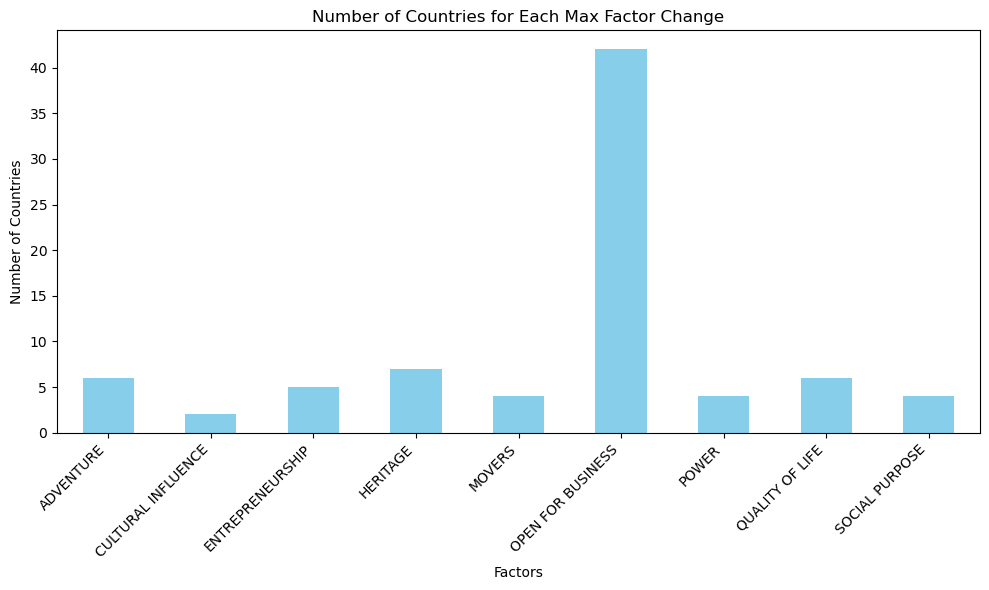

In [58]:
num_countries = segmented_countries.apply(len)

plt.figure(figsize=(10, 6))
num_countries.plot(kind='bar', color='skyblue')
plt.title('Number of Countries for Each Max Factor Change')
plt.xlabel('Factors')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**(c) Country segmentation by K-means Algorithm**

In [81]:
ddf =merge_df.iloc[:,:-2].copy()

In [82]:
ddf

,country,year,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,gdp_ppp
1,Algeria,2017,9.016338,9.233222,8.881764,0.000000,236.982925,21.475571,32.399951,32.040677,65.123300,11809.483033
2,Algeria,2018,2.285807,30.552406,14.732615,0.000000,303.842710,40.339068,40.188191,52.202610,69.621287,12007.774713
3,Algeria,2022,18.540383,12.989801,30.327903,13.543709,279.962842,38.332639,32.675425,40.728448,71.251173,13209.596769
5,Argentina,2017,30.400208,34.830968,41.783181,67.613302,75.968025,163.609087,10.836444,129.087980,39.560662,23597.117753
6,Argentina,2018,29.175445,24.197229,36.630003,56.826740,73.678382,158.552905,10.852923,117.201940,61.159672,23294.098675
...,...,...,...,...,...,...,...,...,...,...,...,...
503,Viet Nam,2018,8.249414,19.687609,2.518348,8.802659,62.315038,25.287481,10.873556,41.471465,64.023951,9867.667881
504,Viet Nam,2019,8.779407,22.033696,3.411422,9.703480,63.605053,30.075192,10.624688,50.621936,61.538201,10686.804055
505,Viet Nam,2020,13.011805,24.904763,3.260086,10.878291,83.935007,34.439600,12.910109,55.151047,52.060021,11036.000528
506,Viet Nam,2021,11.570196,26.476384,2.289109,11.388993,79.579464,37.761043,19.250743,54.144539,54.417747,11727.795733


In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = ddf.drop(['country', 'year', 'gdp_ppp'], axis=1)

# Choosing number of clusters
n_clusters = len(features.columns)

# Get the dominant feature for each country
dominant_features = features.idxmax(axis=1)

# Define a dictionary mapping feature names to cluster numbers
feature_clusters = {feature: i for i, feature in enumerate(features.columns)}

# Map dominant features to cluster numbers
dominant_feature_clusters = dominant_features.map(feature_clusters)

# Applying K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

ddf['cluster'] = dominant_feature_clusters

for cluster_id in range(n_clusters):
    feature_name = features.columns[cluster_id]
    countries_in_cluster = ddf[ddf['cluster'] == cluster_id]['country'].unique().tolist()
    print(f"{feature_name}: {', '.join(countries_in_cluster)}")


ENTREPRENEURSHIP: Germany, Japan, Korea, Republic of, Singapore, United Kingdom
QUALITY OF LIFE: Australia, Austria, Belgium, Canada, Denmark, New Zealand, Sweden
SOCIAL PURPOSE: Austria, Belgium, Denmark, Finland, Netherlands, New Zealand, Norway, Sweden, Switzerland
CULTURAL INFLUENCE: France, Italy
OPEN FOR BUSINESS: Algeria, Azerbaijan, Bahrain, Belarus, Bulgaria, Cambodia, Chile, Croatia, Czechia, Dominican Republic, Ecuador, Estonia, Ghana, Guatemala, Hungary, Indonesia, Ireland, Jordan, Kazakhstan, Kenya, Latvia, Lebanon, Lithuania, Luxembourg, Malaysia, Morocco, Myanmar, Oman, Panama, Peru, Philippines, Poland, Romania, Serbia, Singapore, Slovakia, Slovenia, Sri Lanka, Switzerland, Tunisia, Ukraine, Uruguay, Uzbekistan, Viet Nam
ADVENTURE: Argentina, Brazil, Colombia, Costa Rica, Dominican Republic, Portugal, Thailand
POWER: China, Israel, Russian Federation, Saudi Arabia, United States
HERITAGE: Egypt, Greece, India, Lebanon, Mexico, Morocco, Portugal, South Africa, Spain, Tur

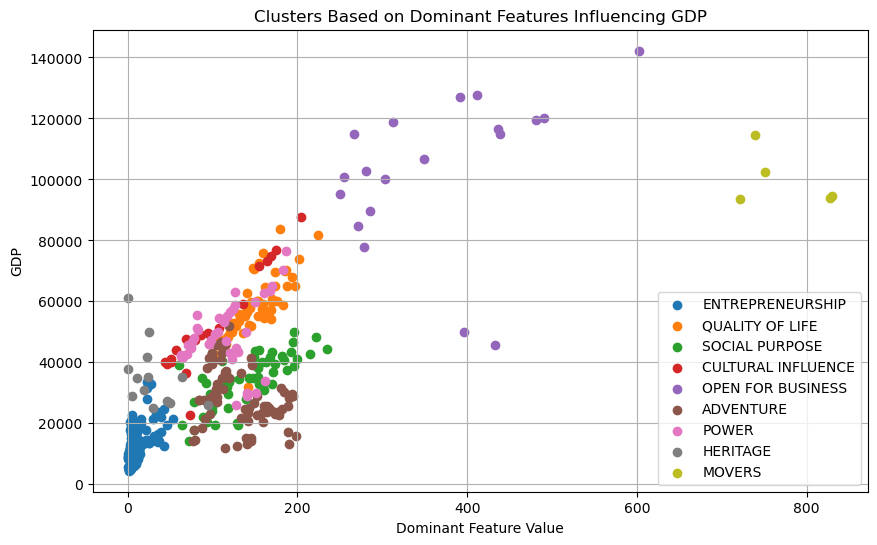

In [88]:
plt.figure(figsize=(10, 6))

for cluster_id in range(n_clusters):
    feature_name = features.columns[cluster_id]
    cluster_countries = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_countries[feature_name], cluster_countries['gdp_ppp'], label=feature_name)

plt.xlabel('Dominant Feature Value')
plt.ylabel('GDP')
plt.title('Clusters Based on Dominant Features Influencing GDP')
plt.legend()
plt.grid(True)
plt.show()


In [98]:
ddf

,country,year,ENTREPRENEURSHIP,QUALITY OF LIFE,SOCIAL PURPOSE,CULTURAL INFLUENCE,OPEN FOR BUSINESS,ADVENTURE,POWER,HERITAGE,MOVERS,gdp_ppp,cluster
1,Algeria,2017,9.016338,9.233222,8.881764,0.000000,236.982925,21.475571,32.399951,32.040677,65.123300,11809.483033,4
2,Algeria,2018,2.285807,30.552406,14.732615,0.000000,303.842710,40.339068,40.188191,52.202610,69.621287,12007.774713,4
3,Algeria,2022,18.540383,12.989801,30.327903,13.543709,279.962842,38.332639,32.675425,40.728448,71.251173,13209.596769,4
5,Argentina,2017,30.400208,34.830968,41.783181,67.613302,75.968025,163.609087,10.836444,129.087980,39.560662,23597.117753,5
6,Argentina,2018,29.175445,24.197229,36.630003,56.826740,73.678382,158.552905,10.852923,117.201940,61.159672,23294.098675,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Viet Nam,2018,8.249414,19.687609,2.518348,8.802659,62.315038,25.287481,10.873556,41.471465,64.023951,9867.667881,8
504,Viet Nam,2019,8.779407,22.033696,3.411422,9.703480,63.605053,30.075192,10.624688,50.621936,61.538201,10686.804055,4
505,Viet Nam,2020,13.011805,24.904763,3.260086,10.878291,83.935007,34.439600,12.910109,55.151047,52.060021,11036.000528,4
506,Viet Nam,2021,11.570196,26.476384,2.289109,11.388993,79.579464,37.761043,19.250743,54.144539,54.417747,11727.795733,4


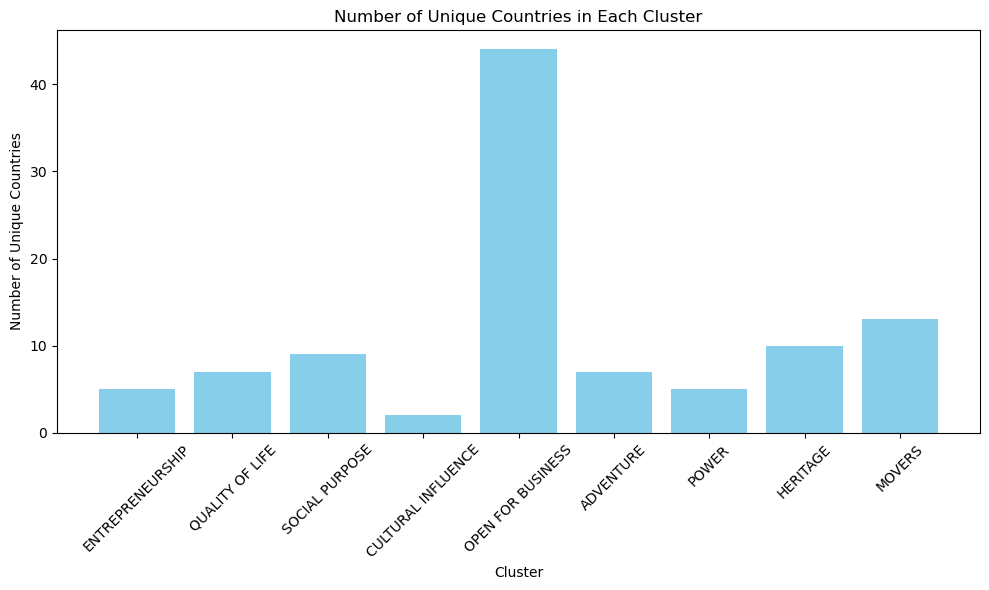

In [99]:
cluster_counts = ddf.groupby('cluster')['country'].nunique()

cluster_names = {
    0: 'ENTREPRENEURSHIP',
    1: 'QUALITY OF LIFE',
    2: 'SOCIAL PURPOSE',
    3: 'CULTURAL INFLUENCE',
    4: 'OPEN FOR BUSINESS',
    5: 'ADVENTURE',
    6: 'POWER',
    7: 'HERITAGE',
    8: 'MOVERS'
}

# Map cluster names to cluster numbers
cluster_names = {cluster_names[cluster_id]: count for cluster_id, count in cluster_counts.items()}

plt.figure(figsize=(10, 6))
plt.bar(cluster_names.keys(), cluster_names.values(), color='skyblue')
plt.title('Number of Unique Countries in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Unique Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [109]:
#For checking
import numpy as np

coefficients_2017 = {
    'ENTREPRENEURSHIP': 9.016338,
    'QUALITY OF LIFE': 9.233222,
    'SOCIAL PURPOSE': 8.881764,
    'CULTURAL INFLUENCE': 0.000000,
    'OPEN FOR BUSINESS': 236.982925,
    'ADVENTURE': 21.475571,
    'POWER': 32.399951,
    'HERITAGE': 32.040677,
    'MOVERS': 65.123300
}

coefficients_2018 = {
    'ENTREPRENEURSHIP': 2.285807,
    'QUALITY OF LIFE': 30.552406,
    'SOCIAL PURPOSE': 14.732615,
    'CULTURAL INFLUENCE': 0.000000,
    'OPEN FOR BUSINESS': 303.842710,
    'ADVENTURE': 40.339068,
    'POWER': 40.188191,
    'HERITAGE': 52.202610,
    'MOVERS': 69.621287
}

coefficients_2022 = {
    'ENTREPRENEURSHIP': 18.540383,
    'QUALITY OF LIFE': 12.989801,
    'SOCIAL PURPOSE': 30.327903,
    'CULTURAL INFLUENCE': 13.543709,
    'OPEN FOR BUSINESS': 279.962842,
    'ADVENTURE': 38.332639,
    'POWER': 32.675425,
    'HERITAGE': 40.728448,
    'MOVERS': 71.251173
}

# Calculate the factor with the highest absolute coefficient for each year
most_influential_factor_2017 = max(coefficients_2017, key=lambda k: abs(coefficients_2017[k]))
most_influential_factor_2018 = max(coefficients_2018, key=lambda k: abs(coefficients_2018[k]))
most_influential_factor_2022 = max(coefficients_2022, key=lambda k: abs(coefficients_2022[k]))

print("Most influential factor for Algeria in 2017:", most_influential_factor_2017)
print("Most influential factor for Algeria in 2018:", most_influential_factor_2018)
print("Most influential factor for Algeria in 2022:", most_influential_factor_2022)


Most influential factor for Algeria in 2017: OPEN FOR BUSINESS
Most influential factor for Algeria in 2018: OPEN FOR BUSINESS
Most influential factor for Algeria in 2022: OPEN FOR BUSINESS
